In [1]:
import pandas as pd
import numpy as np

# 1. 데이터 수집 및 가설 검토

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### shape을 통해 데이터가 891행, 21열로 구성된 것을 알 수 있다.

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

### info를 통해 일부 칼럼의 경우 값이 개수가 891보다 적은 것을 알 수 있다. 이는 해당 칼럼에 대한 feature engineering이 필요함을 의미한다.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### isnull을 통해 칼럼별 null 값의 개수를 확인할 수 있다.

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 시각화

In [10]:
import matplotlib.pyplot as plt
# matplotlib inline
import seaborn as sns
sns.set()   # setting seaborn default for plot

In [11]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    chart_df = pd.DataFrame([survived, dead])
    chart_df.index = ['survived', 'dead']
    chart_df.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

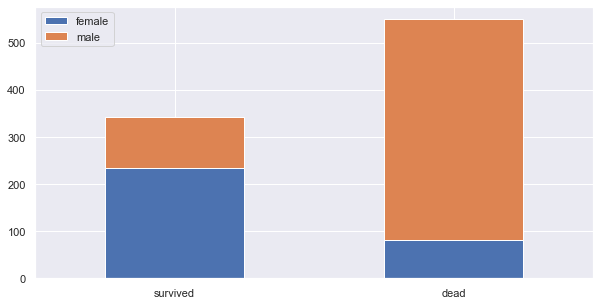

In [12]:
bar_chart("Sex")

### 위의 표를 보고 어떤 가설을 세울 수 있나요? 
### "남자들은 여자들보다 ~~~ 하다"

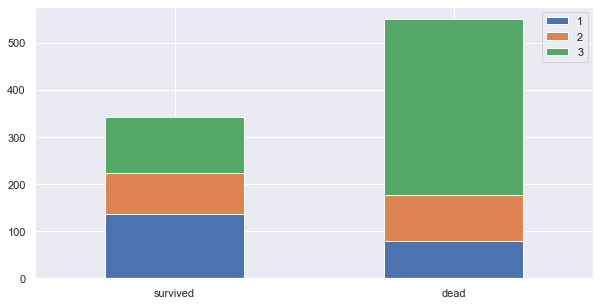

In [13]:
bar_chart("Pclass")

### 위의 표를 보면서 Pclass (passenger class 탑승객 등급)에 따른 사망 가설을 세워보자.

### 동승 가족수 연관성을 확인하기 위해 SibSp와 Parch를 더해 family 칼럼을 만든다.

In [14]:
train_df["family"] = train_df["SibSp"] + train_df["Parch"]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


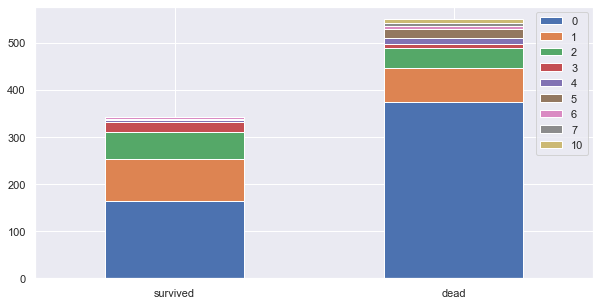

In [15]:
bar_chart("family")

### 위의 표를 보면서 어떤 가설을 세울 수 있을까??

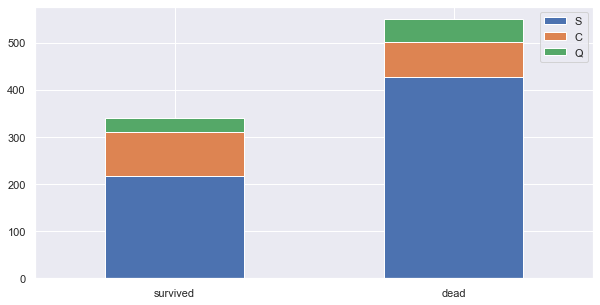

In [16]:
bar_chart("Embarked")

### 위의 표를 보면서 어떤 가설을 세울 수 있을까?

# 2. Feature Engineering

1) 문자로 되어 있는 값들을 feature vector(숫자 배열) 로 만들어 줘야 한다.
    - 컴퓨터가 데이터를 분석하기 위해서는 숫자 형태가 적합하기 때문이다.
2) Nan 값들을 적절한 값들로 변형시켜야 한다.

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 2-1 : Name

In [18]:
train_test_data = [train_df, test_df]  # combining both data

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
# train_df["Title"].head(3)
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Jonkheer      1
Countess      1
Ms            1
Lady          1
Mme           1
Sir           1
Don           1
Name: Title, dtype: int64

In [20]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Col":3, 
                "Mlle":3, "Capt":3, "Ms":3, "Sir":3, "Mme":3, "Lady":3, "Countess":3,
                "Jonkheer":3, "Don":3}
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [21]:
# train_df.head()
train_df["Title"].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

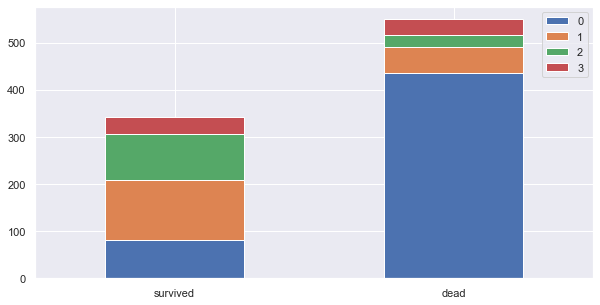

In [22]:
bar_chart('Title')

#### 더이상 필요없는 name 칼럼 삭제  

In [23]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0


## 2-2 : Sex

In [25]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset["Sex"]=dataset["Sex"].map(sex_mapping)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0


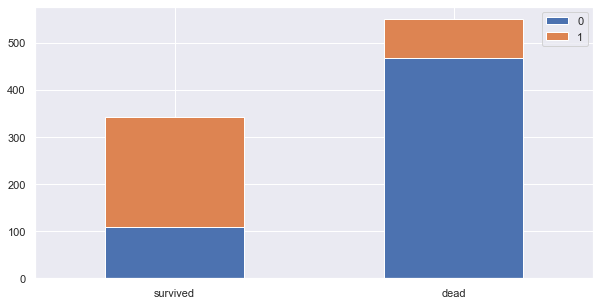

In [27]:
bar_chart('Sex')

## 2-3 :  Age

#### 연령에는 NaN 값이 있고, 이를 적절히 변환해줘야 한다.

In [28]:
train_df.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,1,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,1,2


In [29]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)

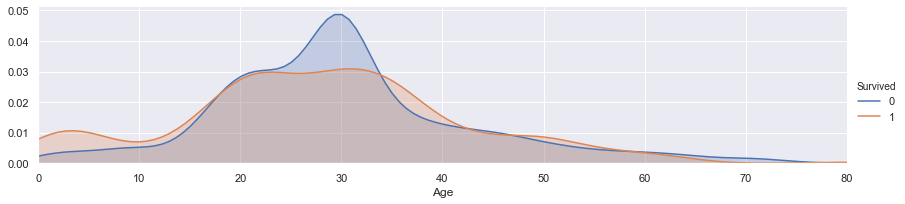

In [30]:
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.show()

(0, 20)

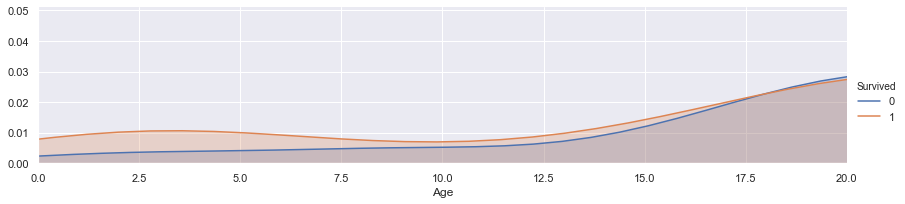

In [31]:
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [32]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1, 
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4,

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,0


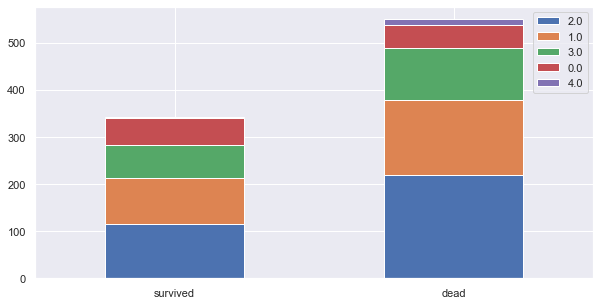

In [34]:
bar_chart("Age")

## 2-4 :  Embarked

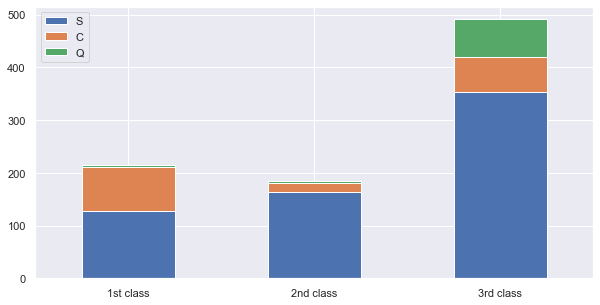

In [35]:
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)



In [36]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,0


In [38]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,1,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0,0


## 2-5 :  Fare

In [40]:
train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_df['Fare'].fillna(test_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

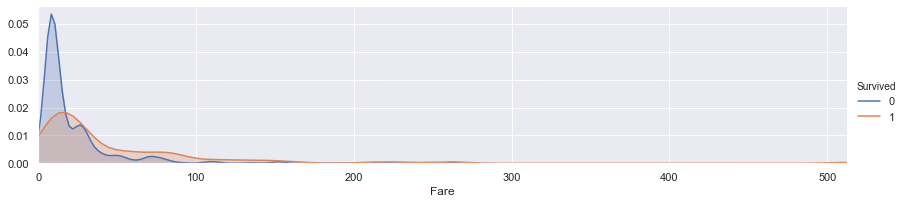

In [41]:
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.show()

(0, 20)

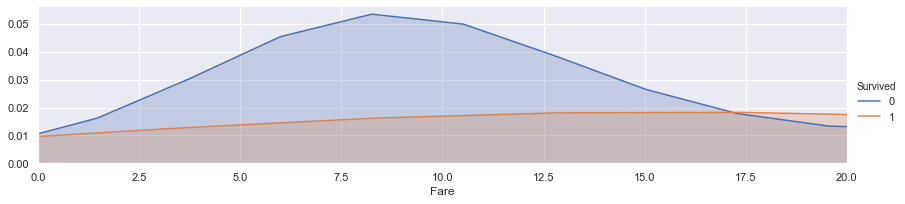

In [42]:
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [43]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,1,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,1,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,0


## 2-6 :  Cabin

In [45]:
train_df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
C22 C26        3
              ..
E49            1
A31            1
D49            1
C95            1
E17            1
Name: Cabin, Length: 147, dtype: int64

#### 맨 앞 영문자만 추출해서 뭐 있나 살펴보기

In [46]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

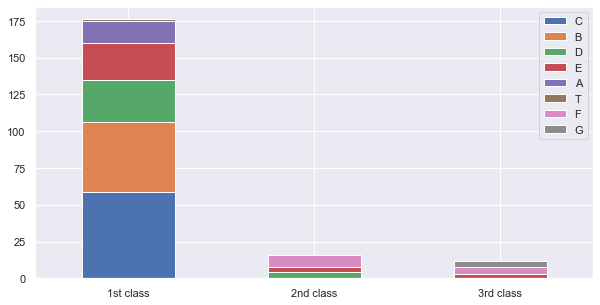

In [47]:
Pclass1 = train_df[train_df['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass'] == 2]['Cabin'].value_counts()
Pclass3= train_df[train_df['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

In [48]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6 , 'F':2, 'G':2.4, 'T':2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [49]:
train_df['Cabin'].head()

0    NaN
1    0.8
2    NaN
3    0.8
4    NaN
Name: Cabin, dtype: float64

In [50]:
train_df['Cabin'].fillna(train_df.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test_df['Cabin'].fillna(test_df.groupby('Pclass')['Cabin'].transform('median'), inplace=True) 

In [51]:
train_df['Cabin'].head()

0    2.0
1    0.8
2    2.0
3    0.8
4    2.0
Name: Cabin, dtype: float64

## 2-7 :  Family Size

In [52]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

(0, 11.0)

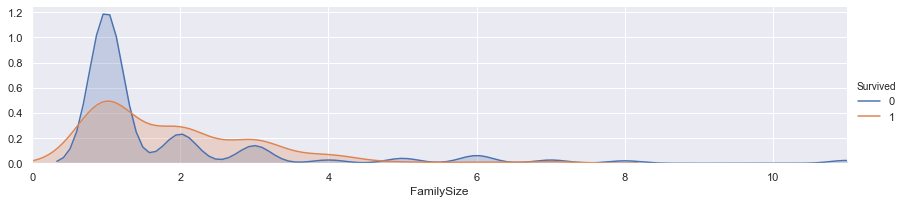

In [54]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [55]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset["FamilySize"] = dataset['FamilySize'].map(family_mapping)

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,1,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,1,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0,0.0


# 최종 정리

In [57]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId'], axis=1)

In [60]:
train_data = train_df.drop(['Survived', 'family'], axis=1)
target = train_df['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [61]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
